# DEV_TEST_INIT

Copyright (C) 2025 Eric Wu. All rights reserved

Date: 10.18.2025

Version: a.2

Intended for use in testing version b.1 of initialization.pyc

## Contents: 

1. [Imports](#1)
    1. [Import Dependencies](#11-import-dependencies)
    1. [Import initialization](#12-import-initialization)
    1. [Import Realm Dependencies](#13-import-import-realm-dependencies)
1. [Testing](#2-testing)
    1. [Set Parameters](#21-set-parameters)
    1. [Run initf.initialize_mm](#22-run-initfinitialize_mm)
    1. [Run initf.quick_check():](#23-run-initfquick_check)
    1. [Save Generated DataFrames to CSVs for analysis](#24-save-generated-dataframes-to-csvs-for-analysis)
1. [Basic QA](#3-basic-qa)
    1. [Ensure Uniqueness in Referential Integrity](#31-ensure-uniqueness-in-referential-integrity)
    1. [Check Referential Integrity](#32-check-referential-integrity)
    1. [Check Expected Behaviors](#33-check-expected-behaviors)
    1. [Check Locations on Islands](#34-check-locations-overlayed-on-the-island)
    1. [Check Expected Behvior P2](#35-check-expected-behavior)


## 1. Imports

### 1.1 Import Dependencies

In [1]:
import numpy as np 
import pandas as pd
import sys
import os
import matplotlib.pyplot as plt

### 1.2 Import initialization

In [2]:
! git clone https://github.com/ewu22gmu/MM_DEV_TEST
import initialization as initf

fatal: destination path 'MM_DEV_TEST' already exists and is not an empty directory.


### 1.3 Import Realm Dependencies

In [3]:
mydir = '/Users/eric/Documents/CDS465/'

pysrc = mydir + 'pysrc/'
datadir = mydir + 'data/'
popdir = mydir + 'population/'

sys.path.append( pysrc )

import Main
E = Main.Realm( datadir )
E.ReadAll(popdir + 'pop3_6.db')

## 2. Testing

### 2.1 Set Parameters

In [4]:
folder_path = '/Users/eric/Documents/MM_DEV_TEST/BASE_DATA' ###NOTE: set to where the BASE_DATA folder is saved

### 2.2 Run initf.initialize_mm

In [5]:
mm_dfs = initf.initialize_mm(E,folder_path)

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer: Error while type casting for column 'resource_quantity'

### 2.3 Run initf.quick_check():

In [ ]:
initf.quick_look(mm_dfs)

mm_product_master
product_id           object
manufacture_id       object
manufacture_time      int64
manufacture_cost    float64
product_count         int64
location_coord       object
dtype: object
  product_id manufacture_id  manufacture_time  manufacture_cost  \
0    p000001        m000001                 1              2.48   
1    p000004        m000004                 2              8.30   
2    p000007        m000007                 1              6.40   
3    p000010        m000010                 1              9.26   
4    p000013        m000013                 1              4.97   

   product_count    location_coord  
0              0  (1184.0, 1504.0)  
1              0  (1184.0, 1312.0)  
2              0  (1248.0, 1312.0)  
3              0  (1184.0, 1504.0)  
4              0  (1248.0, 1312.0)   

mm_manufacture_master
manufacture_id       object
resource_id          object
resource_quantity     int64
dtype: object
  manufacture_id resource_id  resource_quantity
0    

### 2.4 Save Generated DataFrames to CSVs for analysis

```py
path = '' ###NOTE: set a file path to save DataFrames to

for name, df in mm_dfs.items():
    df.to_csv(path+name,mode='w')

## 3. Basic QA

### 3.1 Ensure Uniqueness in Referential Integrity

In [ ]:
print(f'{"Location_coord is unique and is a valid PK" if len(mm_dfs['mm_location_master']['location_coord'].unique()) == len(mm_dfs['mm_location_master']) else "Location_coord fails to be a PK"}')

Location_coord is unique and is a valid PK


### 3.2 Check Referential Integrity

In [ ]:
pd.merge(mm_dfs['mm_location_master'],mm_dfs['mm_books'], on='location_coord').sample(5)

,location_coord,domain,subdomain,location_energy,required_personelle_num,required_personelle_types,manufacture_capacity,balance,period_s,period_e,balance_s,balance_e,period_income,sales_tax
0,"(482.0, 802.0)",resource,farming,-1,10,NaN,0,100000.0,1,3,100000.0,0.0,0.0,0.0
11,"(1248.0, 1312.0)",manufacturing,manufacturing,-1,50,NaN,999,1000000.0,1,3,1000000.0,0.0,0.0,0.0
3,"(736.0, 672.0)",resource,farming,-1,10,NaN,0,100000.0,1,3,100000.0,0.0,0.0,0.0
7,"(1056.0, 992.0)",resource,mining,-1,12,NaN,0,500000.0,1,3,500000.0,0.0,0.0,0.0
14,"(1184.0, 1312.0)",manufacturing,manufacturing,-1,50,NaN,999,1000000.0,1,3,1000000.0,0.0,0.0,0.0


In [ ]:
pd.merge(mm_dfs['mm_location_master'],mm_dfs['mm_employee_master'], on='location_coord').groupby(['location_coord','subdomain'])[['pid', 'wage']].agg(list).reset_index().sample(10)

,location_coord,subdomain,pid,wage
12,"(1184.0, 1504.0)",manufacturing,"[70657, 81015, 70527, 69456, 67698, 69940, 800...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,"(736.0, 992.0)",farming,"[72040, 74839, 69200, 68426, 69015, 71775, 650...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
11,"(1184.0, 1440.0)",manufacturing,"[77389, 79504, 69284, 82110, 71149, 69648, 662...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
9,"(1184.0, 1184.0)",mining,"[71059, 74479, 71764, 67374, 70226, 80862, 698...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
13,"(1248.0, 1312.0)",manufacturing,"[63652, 78407, 63536, 66782, 72739, 71535, 818...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,"(672.0, 736.0)",farming,"[72035, 76352, 70081, 62851, 66038, 69681, 800...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,"(800.0, 928.0)",farming,"[70579, 71136, 76420, 79705, 80542, 74093, 755...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,"(736.0, 672.0)",farming,"[72170, 74280, 76228, 67187, 79533, 80359, 712...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
10,"(1184.0, 1312.0)",manufacturing,"[65729, 74722, 76139, 64841, 76832, 68185, 682...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
14,"(1376.0, 672.0)",manufacturing,"[65867, 70189, 74400, 72161, 73746, 76913, 677...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


### 3.3 Check Expected Behaviors

In [ ]:
pd.merge(mm_dfs['mm_product_master'], 
         pd.merge(mm_dfs['mm_manufacture_master'],
                  mm_dfs['mm_resource_master'],
                  on='resource_id'
                ),
            on='manufacture_id' 
         ).sample(5)

,product_id,manufacture_id,manufacture_time,manufacture_cost,product_count,location_coord_x,resource_id,resource_quantity,resource_cost,resource_count,resource_inputs,location_coord_y
30,p000107,m000107,2,7.64,0,"(1376.0, 672.0)",r100002,1,13.00,0.0,"(1, 1, 1)","(928.0, 992.0)"
3,p000004,m000004,2,8.30,0,"(1184.0, 1312.0)",r000004,1,13.50,0.0,"(0, 1, 1)","(800.0, 928.0)"
19,p000028,m000028,2,12.81,0,"(1184.0, 1504.0)",r000014,2,16.13,0.0,"(0, 1, 1)","(482.0, 802.0)"
26,p000104,m000104,2,9.51,0,"(1184.0, 1504.0)",r100001,5,5.51,0.0,"(0, 1, 1)","(736.0, 992.0)"
55,p000125,m000125,3,190.49,0,"(1248.0, 1312.0)",r100001,3,5.51,0.0,"(0, 1, 1)","(736.0, 992.0)"


In [ ]:
pd.merge(mm_dfs['mm_manufacture_master'],
                  mm_dfs['mm_resource_master'],
                  on='resource_id'
                ).groupby(['manufacture_id'])[['resource_id','resource_quantity','resource_cost']].agg(list).reset_index().sample(5)

,manufacture_id,resource_id,resource_quantity,resource_cost
24,m000216,"[r100001, r100011, r100013, r100014, r100004]","[3, 10, 3, 2, 1]","[5.51, 20.0, 16.14, 45.0, 5.0]"
17,m000122,"[r100001, r100003, r100004, r100005]","[6, 4, 45, 5]","[5.51, 7.5, 5.0, 28.13]"
13,m000110,"[r100001, r100003, r100004, r100009]","[10, 3, 20, 1]","[5.51, 7.5, 5.0, 80.0]"
7,m000022,[r000012],[3],[6.45]
32,m000316,[r200004],[2],[3.05]


In [ ]:
pd.merge(mm_dfs['mm_product_master'], 
         pd.merge(mm_dfs['mm_manufacture_master'],
                  mm_dfs['mm_resource_master'],
                  on='resource_id'
                ),
            on='manufacture_id' 
         ).groupby(['product_id','manufacture_time', 'manufacture_cost'])[['resource_id','resource_quantity','resource_cost']].agg(list).reset_index().sample(5)

,product_id,manufacture_time,manufacture_cost,resource_id,resource_quantity,resource_cost
19,p000301,2,20.02,[r200001],[1],[2.61]
22,p000310,1,0.51,[r200003],[1],[3.0]
24,p000316,2,96.01,[r200004],[2],[3.05]
21,p000307,1,1.34,[r200003],[1],[3.0]
2,p000007,1,6.40,"[r000005, r000006]","[2, 2]","[7.0, 2.0]"


### 3.4 Check locations overlayed on the island

```python
island_raw = E.isle['raw']

vh = np.array(mm_dfs['mm_location_master']['location_coord'].to_list(), dtype=np.int64)

pixel_size = 10
half_size = pixel_size // 2

for y_center, x_center in vh:
    y_start = max(0, y_center - half_size)
    y_end = min(2048, y_center + half_size + 1)
    x_start = max(0, x_center - half_size)
    x_end = min(2048, x_center + half_size + 1)
    island_raw[y_start:y_end, x_start:x_end, :] = [0, 0, 0]

plt.imshow(island_raw)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
/var/folders/9v/q1p9lnr906n75d765h87_j9h0000gn/T/ipykernel_67083/2151233130.py:33: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


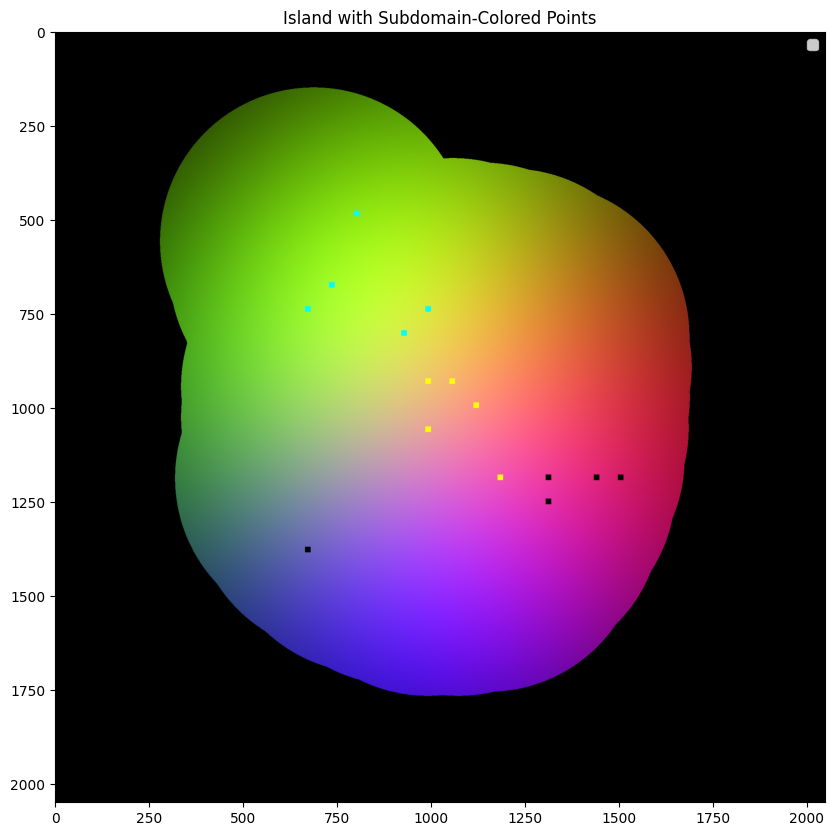

In [ ]:
island_raw = E.isle['raw']

color_map = {
    'farming': [0, 255, 255],     #cyan
    'mining': [255, 255, 0],      #yellow
    'manufacturing': [0, 0, 0] #black
}

pixel_size = 15
half_size = pixel_size // 2

for index, row in mm_dfs['mm_location_master'].iterrows():
    #get coordinates and subdomain
    location_coord = row['location_coord']
    subdomain = row['subdomain']
    
    #get centers
    y_center, x_center = location_coord
    y_center, x_center = int(y_center), int(x_center)
    
    #pixel "shape + size"
    y_start = max(0, y_center - half_size)
    y_end = min(2048, y_center + half_size + 1)
    x_start = max(0, x_center - half_size)
    x_end = min(2048, x_center + half_size + 1)

    #apply color
    island_raw[y_start:y_end, x_start:x_end] = color_map[subdomain]

plt.figure(figsize=(10, 10))
plt.imshow(island_raw)
plt.title("Island with Subdomain-Colored Points")
plt.legend()
plt.show()

### 3.5 Check Expected Behavior

In [ ]:
len(set(mm_dfs['mm_employee_master']['pid']))

360

```python
def calc_xz(x: int, z: int) -> int:
    """
    Calculates x times z and returns the value

    inpts: 
        x (int): An integer
        z (int): An integer

    opts: 
        integer value of the expression
    """

    return x*z

In [ ]:
mm_dfs['mm_employee_master'].groupby('location_coord').count().reset_index().sort_values(by='pid')

,location_coord,pid,wage
0,"(482.0, 802.0)",10,10
1,"(672.0, 736.0)",10,10
2,"(736.0, 672.0)",10,10
3,"(736.0, 992.0)",10,10
4,"(800.0, 928.0)",10,10
5,"(928.0, 992.0)",12,12
6,"(928.0, 1056.0)",12,12
7,"(992.0, 1120.0)",12,12
8,"(1056.0, 992.0)",12,12
9,"(1184.0, 1184.0)",12,12


In [ ]:
initf.quick_look(mm_dfs)

mm_product_master
product_id           object
manufacture_id       object
manufacture_time      int64
manufacture_cost    float64
product_count         int64
location_coord       object
dtype: object
  product_id manufacture_id  manufacture_time  manufacture_cost  \
0    p000001        m000001                 1              2.48   
1    p000004        m000004                 2              8.30   
2    p000007        m000007                 1              6.40   
3    p000010        m000010                 1              9.26   
4    p000013        m000013                 1              4.97   

   product_count    location_coord  
0              0  (1184.0, 1504.0)  
1              0  (1184.0, 1312.0)  
2              0  (1248.0, 1312.0)  
3              0  (1184.0, 1504.0)  
4              0  (1248.0, 1312.0)   

mm_manufacture_master
manufacture_id       object
resource_id          object
resource_quantity     int64
dtype: object
  manufacture_id resource_id  resource_quantity
0    

In [ ]:
mm_dfs['mm_resource_master'].groupby('location_coord')['resource_id'].agg((list, 'count')).reset_index().sort_values(by='count')

,location_coord,list,count
8,"(1056.0, 992.0)",[r100012],1
1,"(672.0, 736.0)","[r000003, r200002]",2
9,"(1184.0, 1184.0)","[r000005, r100016]",2
3,"(736.0, 992.0)","[r100001, r200003, r200004]",3
5,"(928.0, 992.0)","[r100002, r100004, r100006]",3
4,"(800.0, 928.0)","[r000004, r000007, r000009, r200005]",4
7,"(992.0, 1120.0)","[r100005, r100007, r100013, r100014]",4
2,"(736.0, 672.0)","[r000008, r000010, r100015, r200001, r200006]",5
0,"(482.0, 802.0)","[r000002, r000006, r000011, r000012, r000013, ...",6
6,"(928.0, 1056.0)","[r000001, r100003, r100008, r100009, r100010, ...",6
